# Communicate Data Findings with Ford GoBike's Trip Data
## by Jiarun He


## Introduction
> Bike Sharing services have been rising in popularity in cities around the world over the past five years. This innovative sharing service allow members to borrow bikes for short distance travels (<30 mins). Almost all of the service providers use advanced mobile and information technologies to not only allow users to lock/unlock a ready-to-use bike easily from the mobile platform, but also allow themselves to receive a wealth of data from the users to help understanding how their bike sharing systems are used. In this data analysis project, I am going to perform a data exploration on the data provided by Ford GoBike data system.

## Preliminary Wrangling
>* I have chosen the Ford GoBike System Data : https://www.fordgobike.com/system-data as the proejct source data
* Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across San Francisco, East Bay and San Jose. 
* Multiple data files are required to be joined together as a full year’s coverage is desired.
* The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [ ]:
folder_name = 'GoBike_Trip_Files'

In [ ]:
makedirs(folder_name)
#first read the 2017 data
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name))
#second, read all 2018 data
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder GoBike_Trip_Files
    unzipped_file.extractall(folder_name)

for month in range(1,4):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder GoBike_Trip_Files
    unzipped_file.extractall(folder_name)

In [ ]:
# Combine All Locally Saved CSVs into One DataFrame
local_csvs = []
for file_name in listdir(folder_name):
    local_csvs.append(pd.read_csv(folder_name+'/'+file_name))
df = pd.concat(local_csvs)

In [ ]:
df.to_csv('data.csv')

In [2]:
df = pd.read_csv('data.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [5]:
dtype={'bike_id': int}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2883851 entries, 0 to 2883850
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 352.0+ MB


In [7]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


### What is the structure of your dataset?

> There are 2,883,850 rides entries in the dataset with 16 features such as bike_id	bike_share_for_all_trip	duration_sec, etc. Most of the attributes are numeric in this dataframe. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in the following areas:
  1. What's the average trip distance? (Univariate Exploration)
  2. Does trip distance depend on user group (subscriber vs. customer)? (Bivariate Exploration)
  3. How does seasonality (weather condition) affect the trip distance of each user group? (Multivariate)
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start time and date, End time and date, user type, end_station_latitude, end_station_longitude, start_station_latitude, start_station_longitude will support my investigation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Q1. What's the average trip distance?

### Generate new a new attribute: 'distance_km'

In [8]:
#https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas?noredirect=1&lq=1

def distance(origin, destination):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [9]:
df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [10]:
df_copy=df.copy()

In [11]:
df_copy.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,distance_km
count,2.883851e+06,2.883851e+06,2.871606e+06,2.883851e+06,2.883851e+06,2.681895e+06,2.871606e+06,2.883851e+06,2.883851e+06,2.883851e+06
mean,2.630961e+03,8.849844e+02,1.168995e+02,3.776902e+01,-1.223527e+02,1.982964e+03,1.186641e+02,3.776888e+01,-1.223532e+02,1.616095e+00
std,1.654795e+03,2.531323e+03,1.011717e+02,1.003054e-01,1.475031e-01,1.046099e+01,1.012824e+02,1.004084e-01,1.478970e-01,1.044516e+00
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.878000e+03,3.000000e+00,3.726331e+01,-1.224737e+02,0.000000e+00
25%,1.298000e+03,3.520000e+02,3.000000e+01,3.777143e+01,-1.224107e+02,1.978000e+03,3.000000e+01,3.777106e+01,-1.224117e+02,8.841917e-01
50%,2.508000e+03,5.580000e+02,8.500000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.600000e+01,3.778127e+01,-1.223983e+02,1.392227e+00
75%,3.664000e+03,8.740000e+02,1.820000e+02,3.779591e+01,-1.222948e+02,1.990000e+03,1.830000e+02,3.779539e+01,-1.222935e+02,2.108326e+00
max,7.082000e+03,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,2.001000e+03,4.070000e+02,4.551000e+01,-7.357000e+01,6.942562e+01


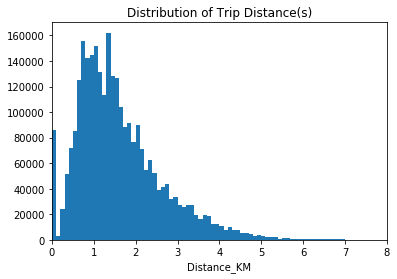

In [12]:
# Plot the distribution of trip distance
bin_edges = np.arange(0, df_copy['distance_km'].max() + 0.1 , 0.1)
plt.hist(data = df_copy , x = 'distance_km' , bins = bin_edges)
plt.xlabel('Distance_KM')
plt.title('Distribution of Trip Distance(s)')
plt.xlim(0,8)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It is right screwed with a long tail on the right. I am going to add log transformation to x axis. Also, there are lots of trips with zero distance, those can be the trips that users returned bikes to the same place, this may look odd on the graph but it makes logical sense.


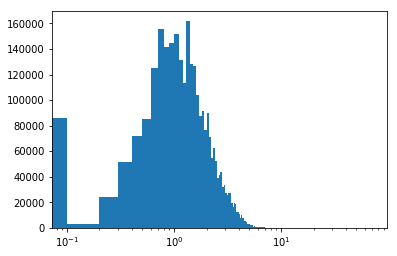

In [17]:
bins = np.arange(0,df_copy['distance_km'].max()+0.1,0.1)
plt.hist(data = df_copy , x = 'distance_km' , bins = bins);
plt.xscale('log')

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the step above, I have performed a trail on log transformation. As we can see, a lot of distance entry has zero KM, I believe this is due to the return to the same location, therefore, I will do no adjustment to the data.

In [19]:
np.log(df_copy['distance_km'].describe())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    14.874637
mean      0.480013
std       0.043554
min           -inf
25%      -0.123081
50%       0.330904
75%       0.745894
max       4.240256
Name: distance_km, dtype: float64

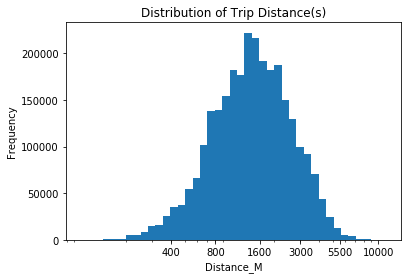

In [20]:
df_copy['distance_m'] = df_copy['distance_km'] * 1000
bin_edges = 10**np.arange(2 , 4+0.1 , 0.05)
ticks =  [400,800,1600,3000,5500,10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'distance_m' , bins = bin_edges);
#plt.xticks(ticks,labels);
plt.xlabel('Distance_M');
plt.xscale('log');
plt.title('Distribution of Trip Distance(s)')
plt.ylabel('Frequency')
plt.xticks(ticks,labels)
plt.show()

We can see by the plot above, most of bike users ride bikes for a short distance around 1.6 KM. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Q2. Does trip distance depend on user group (subscriber vs. customer)? 

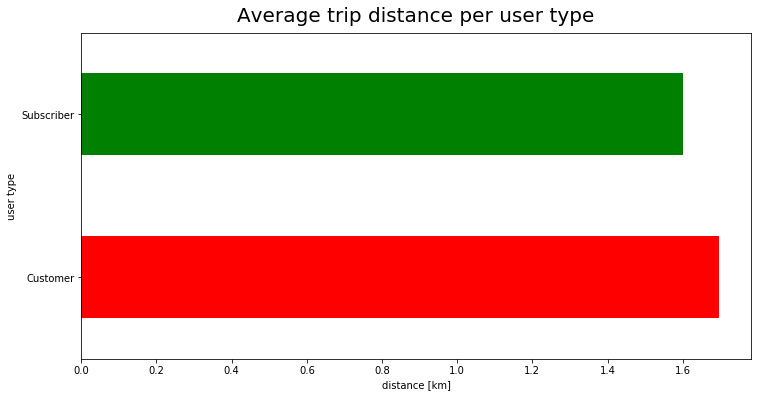

In [21]:
ax = df_copy.groupby('user_type')['distance_km'].mean().plot(kind='barh', color=['red', 'green'], figsize=(12,6))
ax.set_title('Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type')
ax.set_xlabel('distance [km]')
plt.show()

#### We can see that on average customers travel 1.7 km, and subscribers travel 1.6 km on average.

In [22]:
df_copy['member_age'] = 2019-df_copy['member_birth_year']

In [23]:
#Generate a new field for member age group from member_age_bin
df_copy['member_age_bins'] = df_copy['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else 'other')

In [24]:
trip_age_df = df_copy.groupby('member_age_bins').agg({'bike_id':'count'})
trip_age_df['perc'] = (trip_age_df['bike_id']/trip_age_df['bike_id'].sum())*100


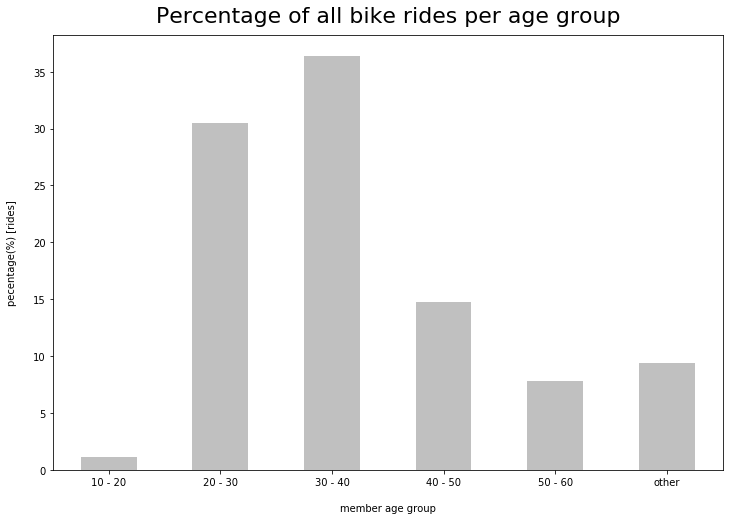

In [25]:
trip_age_df['perc'].plot(kind='bar',color='silver', figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.show()

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscriber's average trip distance is about 1.6 km. 

> Customer's average trip duration is about 1.7 km.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> People in age from 20-40 years old consume more than 65% of bike rides. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Q3. How does seasonality (weather condition) affect the trip distance of each user group? (Multivariate)

In [26]:
df_copy['month'] = pd.DatetimeIndex(df_copy['start_time']).month

In [39]:
#Generate a new field for season group from month
df_copy['season'] = df_copy['month'].apply(lambda x: 'Spring' if x in [3 , 4 , 5]
                                                  else 'Summer' if x in [6 , 7 , 8]
                                                  else 'Fall' if x in [9 , 10 , 11]
                                                  else 'Winter' if x in [12 , 1 , 2]
                                                  else 'unknown')

In [40]:
df_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_name,start_time,user_type,distance_km,distance_m,member_age,member_age_bins,month,season,year
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,...,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber,2.271143,2271.143372,31.0,30 - 40,2,Winter,2018
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,...,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer,1.888406,1888.405653,32.0,30 - 40,2,Winter,2018
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,...,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer,2.788929,2788.928640,33.0,30 - 40,2,Winter,2018
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,...,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer,2.788929,2788.928640,38.0,30 - 40,2,Winter,2018
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,...,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber,1.629574,1629.574026,43.0,40 - 50,2,Winter,2018


In [41]:
df_copy['season_num'] = df_copy['month'].apply(lambda x: '1' if x in [3 , 4 , 5]
                                                  else '2' if x in [6 , 7 , 8]
                                                  else '3' if x in [9 , 10 , 11]
                                                  else '4' if x in [12 , 1 , 2]
                                                  else '99')

In [42]:
df_copy['year'] = pd.DatetimeIndex(df_copy['start_time']).year

In [43]:
df_copy_2018 = df_copy[df_copy['year']==2018]

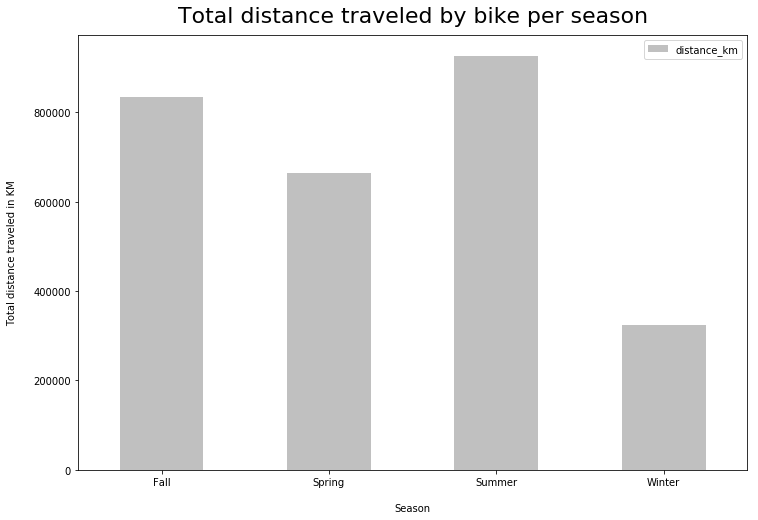

In [44]:
test_df = df_copy_2018.groupby('season').agg({'distance_km':'sum'})
#test_df['perc'] = (test_df['bike_id']/test_df['bike_id'].sum())*100
#trip_age_df['perc'].plot(kind='bar',color='silver', figsize=(12,8))
test_df.plot(kind='bar',color='silver', figsize=(12,8))
plt.title('Total distance traveled by bike per season', fontsize=22, y=1.015)
plt.xlabel('Season', labelpad=16)
plt.ylabel('Total distance traveled in KM', labelpad=16)
plt.xticks(rotation=360)
plt.show()

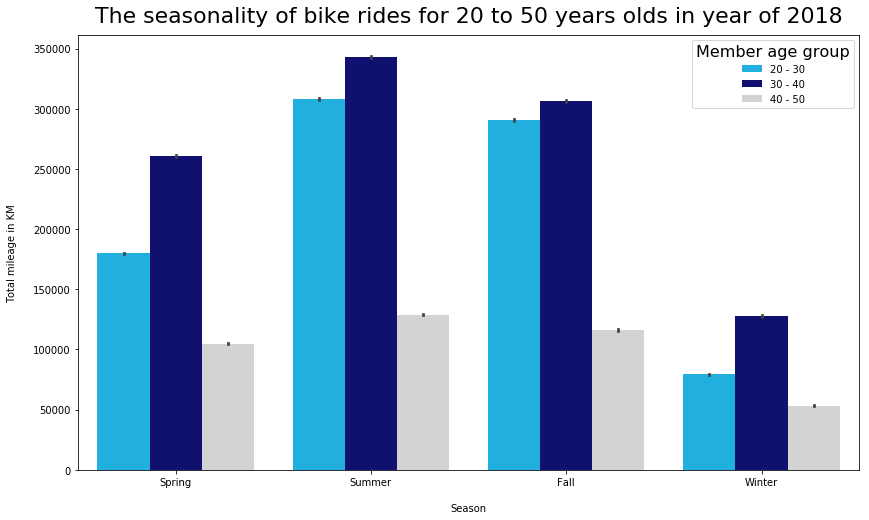

In [46]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'lightgrey'}
ax = sb.barplot(x='season', y='distance_km', estimator=sum, hue='member_age_bins', palette=my_palette, data=df_copy_2018[df_copy_2018['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['season_num', 'member_age_bins']))
plt.title('The seasonality of bike rides for 20 to 50 years olds in year of 2018', fontsize=22, y=1.015)
plt.xlabel('Season', labelpad=16)
plt.ylabel('Total mileage in KM', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
#ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Poeple in age 30-40 consume more than twice of the bike service mileage than people in age group 40-50 in all four seasons.

> Summer is the most popular season of the year across all age groups

### Were there any interesting or surprising interactions between features?

> It's interesting to see people prefer fall weather than spring (more total mileage in fall than spring), I think it's due to the fact that there are more raining days in spring in general than fall [1]. 


[1] "First month of spring is rainy with average temperature about 13 °C (55 °F)." reference:https://seasonsyear.com/USA/San-Francisco

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [47]:
df_copy.to_csv('final_df.csv')

### Reference

https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/Communicate%20Data%20Findings%20with%20Ford%20Bike%20Sharing%20Data/Data-Exploration-with-Bike-Data.ipynb

https://github.com/juliaYi/Ford-GoBike-Data-Visualization/blob/master/ford_bike_data_analysis.ipynb

https://github.com/seby-sbirna/Data-Analyst-Nanodegree-Project-Portfolio/blob/master/Project%205%20-%20Communicate%20Data%20Findings/Project%205%20-%20Sebastian%20Sbirna.ipynb

https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas?noredirect=1&lq=1
    
https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib    